<a href="https://colab.research.google.com/github/nceder/qpb4e/blob/main/code/Chapter%2021/Chapter_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21 Processing data files

### 21.2.1 Text encoding: ASCII, Unicode, and others

In [1]:
open('test.txt', 'wb').write(bytes([65, 66, 67, 255, 192,193]))

6

In [2]:
x = open('test.txt').read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte

In [3]:
open('test.txt', errors='ignore').read()

'ABC'

In [4]:
open('test.txt', errors='replace').read()

'ABC���'

In [5]:
open('test.txt', errors='surrogateescape').read()

'ABC\udcff\udcc0\udcc1'

In [6]:
open('test.txt', errors='backslashreplace').read()

'ABC\\xff\\xc0\\xc1'

### 21.2.2 Unstructured text

In [7]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/moby_01.txt &> null  && echo Downloaded


Downloaded


In [3]:
moby_text = open("moby_01.txt").read()     
moby_paragraphs = moby_text.split("\n\n")   
print(moby_paragraphs[1])

There now is your insular city of the Manhattoes, belted round by wharves
as Indian isles by coral reefs--commerce surrounds it with her surf.
Right and left, the streets take you waterward.  Its extreme downtown
is the battery, where that noble mole is washed by waves, and cooled
by breezes, which a few hours previous were out of sight of land.
Look at the crowds of water-gazers there.



In [4]:
moby_text = open("moby_01.txt").read()        #A
moby_paragraphs = moby_text.split("\n\n")
moby = moby_paragraphs[1].lower()             #B
moby = moby.replace(".", "")                  #C
moby = moby.replace(",", "")                  #D
print(moby)
moby_words = moby.split()
print(moby_words)

there now is your insular city of the manhattoes belted round by wharves
as indian isles by coral reefs--commerce surrounds it with her surf
right and left the streets take you waterward  its extreme downtown
is the battery where that noble mole is washed by waves and cooled
by breezes which a few hours previous were out of sight of land
look at the crowds of water-gazers there

['there', 'now', 'is', 'your', 'insular', 'city', 'of', 'the', 'manhattoes', 'belted', 'round', 'by', 'wharves', 'as', 'indian', 'isles', 'by', 'coral', 'reefs--commerce', 'surrounds', 'it', 'with', 'her', 'surf', 'right', 'and', 'left', 'the', 'streets', 'take', 'you', 'waterward', 'its', 'extreme', 'downtown', 'is', 'the', 'battery', 'where', 'that', 'noble', 'mole', 'is', 'washed', 'by', 'waves', 'and', 'cooled', 'by', 'breezes', 'which', 'a', 'few', 'hours', 'previous', 'were', 'out', 'of', 'sight', 'of', 'land', 'look', 'at', 'the', 'crowds', 'of', 'water-gazers', 'there']


### Quick Check: Normalization
Look closely at the list of words generated. Do you see any issues with the normalization so far? What other issues do you think you might encounter in a longer section of text? How do you think you might deal with those issues?

#### Discussion
Double hyphens for em dashes, hyphenation for line breaks and otherwise, and any other punctuation marks would all be potential problems.

Enhancing the word cleaning module you created in chapter 18 would be a good way to cover most of the issues.


### 21.2.3 Delimited flat files

#### File 21.1 temp_data_ pipes_00a.txt

In [37]:
%%writefile temp_data_pipes_00a.txt
Notes
State|Month Day, Year Code|Avg Daily Max Air Temperature (F)|Record Count for Daily Max Air Temp (F)
Illinois|1979/01/01|17.48|994
Illinois|1979/01/02|4.64|994
Illinois|1979/01/03|11.05|994
Illinois|1979/01/04|9.51|994
Illinois|1979/05/15|68.42|994
Illinois|1979/05/16|70.29|994
Illinois|1979/05/17|75.34|994
Illinois|1979/05/18|79.13|994
Illinois|1979/05/19|74.94|994


Overwriting temp_data_pipes_00a.txt


In [11]:
line = "Illinois|1979/01/01|17.48|994"
print(line.split("|"))

['Illinois', '1979/01/01', '17.48', '994']


### Try This: Read A file
Write the code to read a text file (assume the file is `temp_data_pipes_00a.txt`, as shown in the example), split each line of the file into a list of values, and add that list to a single list of records.

(Open ended, no solution provided)

What issues or problems did you encounter in implementing this code? How might you go about converting the last three fields to the correct date, `real`, and `int` types?

#### Discussion
You could use a list comprehension to explicitly convert those fields.




In [63]:
from datetime import datetime

file = open('temp_data_pipes_00a.txt').read()

lines = file.split('\n')

processed_lines = []  # Lista vuota per salvare le righe trasformate

for index, line in enumerate(lines):
    result = line.split('|')
    # Salta le righe vuote
    if not line.strip():
        continue
    if index > 2:
        try:
            result[1] = datetime.strptime(result[1], "%Y/%m/%d").date()
            processed_lines.append(result)  # Aggiungi la riga alla lista
        except ValueError:
            print(f"Errore nel parsing della data: '{result[1]}'")

# Ora processed_lines contiene tutte le righe processate
print(processed_lines)

[['Illinois', datetime.date(1979, 1, 2), '4.64', '994'], ['Illinois', datetime.date(1979, 1, 3), '11.05', '994'], ['Illinois', datetime.date(1979, 1, 4), '9.51', '994'], ['Illinois', datetime.date(1979, 5, 15), '68.42', '994'], ['Illinois', datetime.date(1979, 5, 16), '70.29', '994'], ['Illinois', datetime.date(1979, 5, 17), '75.34', '994'], ['Illinois', datetime.date(1979, 5, 18), '79.13', '994'], ['Illinois', datetime.date(1979, 5, 19), '74.94', '994']]


### 21.2.4 The csv module

In [12]:
results = []
for line in open("temp_data_pipes_00a.txt"):
    fields = line.strip().split("|")
    results.append(fields)

results

[['Notes'],
 ['State',
  'Month Day, Year Code',
  'Avg Daily Max Air Temperature (F)',
  'Record Count for Daily Max Air Temp (F)'],
 ['Illinois', '1979/01/01', '17.48', '994'],
 ['Illinois', '1979/01/02', '4.64', '994'],
 ['Illinois', '1979/01/03', '11.05', '994'],
 ['Illinois', '1979/01/04', '9.51', '994'],
 ['Illinois', '1979/05/15', '68.42', '994'],
 ['Illinois', '1979/05/16', '70.29', '994'],
 ['Illinois', '1979/05/17', '75.34', '994'],
 ['Illinois', '1979/05/18', '79.13', '994'],
 ['Illinois', '1979/05/19', '74.94', '994']]

In [13]:
import csv
results = [fields for fields in csv.reader(open("temp_data_pipes_00a.txt", newline=''), delimiter="|")]
results

[['Notes'],
 ['State',
  'Month Day, Year Code',
  'Avg Daily Max Air Temperature (F)',
  'Record Count for Daily Max Air Temp (F)'],
 ['Illinois', '1979/01/01', '17.48', '994'],
 ['Illinois', '1979/01/02', '4.64', '994'],
 ['Illinois', '1979/01/03', '11.05', '994'],
 ['Illinois', '1979/01/04', '9.51', '994'],
 ['Illinois', '1979/05/15', '68.42', '994'],
 ['Illinois', '1979/05/16', '70.29', '994'],
 ['Illinois', '1979/05/17', '75.34', '994'],
 ['Illinois', '1979/05/18', '79.13', '994'],
 ['Illinois', '1979/05/19', '74.94', '994']]

#### File 21.2 temp_data_01.csv

In [65]:
%%writefile temp_data_01.csv
"Notes","State","State Code","Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Record Count for Daily Max Air Temp (F),Min Temp for Daily Max Air Temp (F),Max Temp for Daily Max Air Temp (F),Avg Daily Max Heat Index (F),Record Count for Daily Max Heat Index (F),Min for Daily Max Heat Index (F),Max for Daily Max Heat Index (F),Daily Max Heat Index (F) % Coverage

,"Illinois","17","Jan 01, 1979","1979/01/01",17.48,994,6.00,30.50,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 02, 1979","1979/01/02",4.64,994,-6.40,15.80,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 03, 1979","1979/01/03",11.05,994,-0.70,24.70,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 04, 1979","1979/01/04",9.51,994,0.20,27.60,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 15, 1979","1979/05/15",68.42,994,61.00,75.10,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 16, 1979","1979/05/16",70.29,994,63.40,73.50,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 17, 1979","1979/05/17",75.34,994,64.00,80.50,82.60,2,82.40,82.80,0.20%
,"Illinois","17","May 18, 1979","1979/05/18",79.13,994,75.50,82.10,81.42,349,80.20,83.40,35.11%
,"Illinois","17","May 19, 1979","1979/05/19",74.94,994,66.90,83.10,82.87,78,81.60,85.20,7.85%


Writing temp_data_01.csv


In [15]:
results2 = [fields for fields in csv.reader(open("temp_data_01.csv", newline=''))]
print(results2)

[['Notes', 'State', 'State Code', 'Month Day, Year', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)', 'Avg Daily Max Heat Index (F)', 'Record Count for Daily Max Heat Index (F)', 'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)', 'Daily Max Heat Index (F) % Coverage'], [], ['', 'Illinois', '17', 'Jan 01, 1979', '1979/01/01', '17.48', '994', '6.00', '30.50', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 02, 1979', '1979/01/02', '4.64', '994', '-6.40', '15.80', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 03, 1979', '1979/01/03', '11.05', '994', '-0.70', '24.70', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 04, 1979', '1979/01/04', '9.51', '994', '0.20', '27.60', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'May 15, 1979

### Quick Check: Handling Quoting
Consider how you'd approach the problems of handling quoted fields and embedded delimiter characters if you didn't have the csv library. Which is easier to handle: the quoting or the embedded delimiters?

#### Discussion

Without using the csv module, you'd have to check whether a field began and ended with the quote characters and then `strip()` them off.

To handle embedded delimiters without using the csv library, you'd have to isolate the quoted fields and treat them differently; then you'd split the rest of the fields by using the delimiter.

### 21.2.5 Reading a csv file as a list of dictionaries

In [67]:
import csv

results = [fields for fields in csv.DictReader(open("temp_data_01.csv", newline=''))]
results[0]

{'Notes': '',
 'State': 'Illinois',
 'State Code': '17',
 'Month Day, Year': 'Jan 01, 1979',
 'Month Day, Year Code': '1979/01/01',
 'Avg Daily Max Air Temperature (F)': '17.48',
 'Record Count for Daily Max Air Temp (F)': '994',
 'Min Temp for Daily Max Air Temp (F)': '6.00',
 'Max Temp for Daily Max Air Temp (F)': '30.50',
 'Avg Daily Max Heat Index (F)': 'Missing',
 'Record Count for Daily Max Heat Index (F)': '0',
 'Min for Daily Max Heat Index (F)': 'Missing',
 'Max for Daily Max Heat Index (F)': 'Missing',
 'Daily Max Heat Index (F) % Coverage': '0.00%'}

In [17]:
results[0]['State']

'Illinois'

# 21.3 Excel files

In [18]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/temp_data_01.xlsx &> null  && echo Downloaded


Downloaded


In [70]:
from openpyxl import load_workbook
wb = load_workbook('temp_data_01.xlsx')
results = []
ws = wb.worksheets[0]
for row in ws.iter_rows():
    results.append([cell.value for cell in row])

print(results)

[['Notes', 'State', 'State Code', 'Month Day, Year', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)', 'Avg Daily Max Heat Index (F)', 'Record Count for Daily Max Heat Index (F)', 'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)', 'Daily Max Heat Index (F) % Coverage'], [None, 'Illinois', 17, 'Jan 01, 1979', '1979/01/01', 17.48, 994, 6, 30.5, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 02, 1979', '1979/01/02', 4.64, 994, -6.4, 15.8, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 03, 1979', '1979/01/03', 11.05, 994, -0.7, 24.7, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 04, 1979', '1979/01/04', 9.51, 994, 0.2, 27.6, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'May 15, 1979', '1979/05/15', 68.42, 994, 61, 75.1, 'Missing', 0, '

### Try This: Cleaning Data
How would you handle the fields with 'Missing' as a possible value for math calculations? Can you write a snippet of code that averages one of those columns?

```
clean_field = [float(x[13]) for x in data_rows if x[13] != 'Missing']
average = sum(clean_field)/len(clean_field)
```
What would you do with the average column at the end so that you could also report the average coverage? In your opinion, would the solution to this problem be at all linked to the way that the 'Missing' entries were handled?

`coverage_values = [float(x[-1].strip("%"))/100]`

It may not be done at the same time as the 'Missing' values are handled.

## 21.4.2 Sorting

In [71]:
%%writefile datafile
ZZZZZZ
CCCCCC
QQQQQQ
AAAAAA

Writing datafile


In [75]:
lines = open("datafile").readlines()
lines.sort()
print(lines)

['AAAAAA\n', 'CCCCCC\n', 'QQQQQQ\n', 'ZZZZZZ\n']


In [78]:
# sort datafile > datafile.srt crea il file ordinato.
# cat datafile.srt mostra il contenuto ordinato.
# Se usi Windows, usa type datafile.srt per visualizzare il file in console.

!sort datafile > datafile.srt
!type datafile.srt

AAAAAA
CCCCCC
QQQQQQ
ZZZZZZ


# 21.5 Writing data files

## 21.5.1 CSV and other delimited files

In [25]:
temperature_data = [['State', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)'], ['Illinois', '1979/01/01', '17.48', '994'], ['Illinois', '1979/01/02', '4.64', '994'], ['Illinois', '1979/01/03', '11.05', '994'], ['Illinois', '1979/01/04', '9.51', '994'], ['Illinois', '1979/05/15', '68.42', '994'], ['Illinois', '1979/05/16', '70.29', '994'], ['Illinois', '1979/05/17', '75.34', '994'], ['Illinois', '1979/05/18', '79.13', '994'], ['Illinois', '1979/05/19', '74.94', '994']]
csv.writer(open("temp_data_03.csv", "w", newline='')).writerows(temperature_data)

In [81]:
data = [{'State': 'Illinois',
 'Month Day, Year Code': '1979/01/01',
 'Avg Daily Max Air Temperature (F)': '17.48',
 'Record Count for Daily Max Air Temp (F)': '994'}]
fields = ['State', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)']

dict_writer = csv.DictWriter(open("temp_data_04.csv", "w"), fieldnames=fields)
dict_writer.writeheader()
dict_writer.writerows(data)
del dict_writer

## 21.5.2 Writing Excel files.

In [ ]:
from openpyxl import Workbook
data_rows = [fields for fields in csv.reader(open("temp_data_01.csv"))]
wb = Workbook()
ws = wb.active
ws.title = "temperature data"
for row in data_rows:
    ws.append(row)

wb.save("temp_data_02.xlsx")

[['Notes', 'State', 'State Code', 'Month Day, Year', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)', 'Avg Daily Max Heat Index (F)', 'Record Count for Daily Max Heat Index (F)', 'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)', 'Daily Max Heat Index (F) % Coverage'], [], ['', 'Illinois', '17', 'Jan 01, 1979', '1979/01/01', '17.48', '994', '6.00', '30.50', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 02, 1979', '1979/01/02', '4.64', '994', '-6.40', '15.80', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 03, 1979', '1979/01/03', '11.05', '994', '-0.70', '24.70', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 04, 1979', '1979/01/04', '9.51', '994', '0.20', '27.60', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'May 15, 1979

# 21.6 Lab 21 Weather observations

The file of weather observations provided here (`Illinois_weather_1979-2011.txt`) is by month and then by county for the state of Illinois from 1979 to 2011. Write the code to process this file to extract the data for Chicago (Cook County) into a single CSV or spreadsheet file.

This process includes replacing the `'Missing'` strings with empty strings and translating the percentage to a decimal. You may also consider what fields are repetitive (and therefore can be omitted or stored elsewhere). The proof that you've got it right occurs when you load the file into a spreadsheet.

**Note:** there is some documentation at the end of the file, so you will need to stop processing the file when the first field of the line is "---".


In [28]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/Illinois_weather_1979-2011.txt &> null  && echo Downloaded

Downloaded


### Raw text of the first 11 lines of the data file:

In [29]:
data = open("Illinois_weather_1979-2011.txt").readlines()
data[:11]

['"Notes"\t"Month"\t"Month Code"\t"County"\t"County Code"\tAvg Daily Max Air Temperature (F)\tRecord Count for Daily Max Air Temp (F)\tMin Temp for Daily Max Air Temp (F)\tMax Temp for Daily Max Air Temp (F)\tAvg Daily Min Air Temperature (F)\tRecord Count for Daily Min Air Temp (F)\tMin Temp for Daily Min Air Temp (F)\tMax Temp for Daily Min Air Temp (F)\tAvg Daily Max Heat Index (F)\tRecord Count for Daily Max Heat Index (F)\tMin for Daily Max Heat Index (F)\tMax for Daily Max Heat Index (F)\tDaily Max Heat Index (F) % Coverage\n',
 '\t"Jan"\t"1"\t"Adams County, IL"\t"17001"\t31.89\t19437\t-10.00\t68.90\t18.01\t19437\t-26.20\t50.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Alexander County, IL"\t"17003"\t41.07\t6138\t2.60\t73.20\t26.48\t6138\t-14.00\t60.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Bond County, IL"\t"17005"\t35.71\t6138\t-2.70\t69.50\t22.18\t6138\t-17.90\t57.20\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Boone County, IL"\

### Raw text of the last 25 lines of the data file, showing the documentation section after "---".

In [30]:
data[-25:]

['\t"Dec"\t"12"\t"White County, IL"\t"17193"\t42.84\t9207\t-4.60\t76.30\t28.48\t9207\t-18.60\t65.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Dec"\t"12"\t"Whiteside County, IL"\t"17195"\t31.74\t10230\t-10.60\t69.20\t19.00\t10230\t-20.10\t54.00\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Dec"\t"12"\t"Will County, IL"\t"17197"\t33.20\t18414\t-10.70\t69.00\t21.46\t18414\t-19.80\t58.00\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Dec"\t"12"\t"Williamson County, IL"\t"17199"\t43.30\t6138\t-4.20\t75.20\t29.55\t6138\t-17.80\t66.20\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Dec"\t"12"\t"Winnebago County, IL"\t"17201"\t30.24\t7161\t-10.60\t67.40\t18.02\t7161\t-21.50\t56.40\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Dec"\t"12"\t"Woodford County, IL"\t"17203"\t34.41\t8184\t-11.30\t70.00\t21.79\t8184\t-22.50\t56.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '"---"\n',
 '"Dataset: North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011)"\n',


## Human solution

In [ ]:
import csv

with (open("Illinois_weather_1979-2011.txt") as infile,
      open("chicago_weather_1979-2011.csv", "w") as outfile):
    for row in csv.reader(infile, delimiter="\t"):
        if row[0] == '---': # Interrompiamo se incontriamo la stringa di documentazione
            break
        if "Cook" in row[3]: # Se troviamo il riferimento a Chigaco allora processiamo la linea
            del row[0:2] # Eliminiamo i primi due campi
            row = [item.replace("Missing", "") for item in row] # Rimpiazziamo il missing
            row[-1] = row[-1].replace("%", "") # Rimpiazziamo il simbolo percentuale dell'ultimo campo
            row[-1] = float(row[-1]) / 100  if str.isdigit(row[-1]) else row[-1] # Convertiamo il valore percentuale in un float solo se è valorizzato
            csv.writer(outfile).writerow(row)


### Remaining Steps

1. Download weather_history.csv to your machine.
2. Import weather_history.cvs into a spreadsheet (e.g. Google sheets or Excel)
3. Select data and insert chart. (creating a graph may be somewhat different in different applications.)

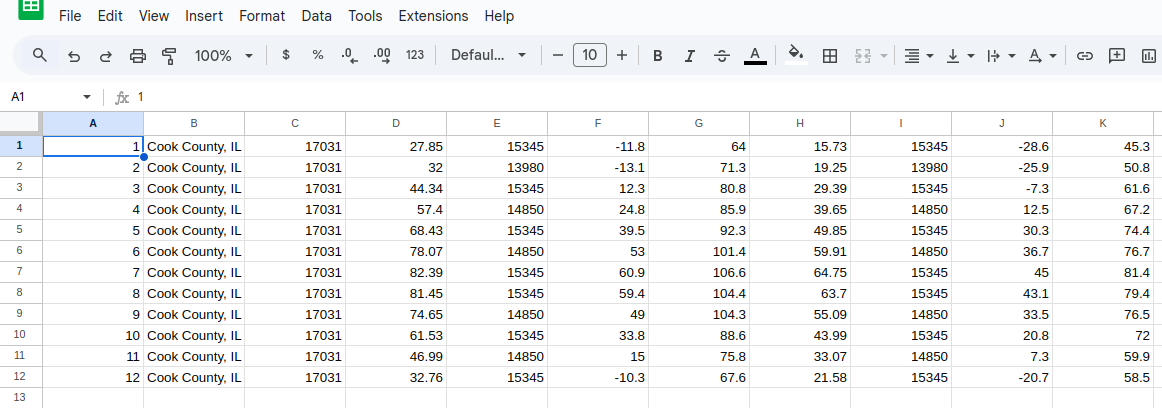

## Copilot solution

### Prompt:

The file of weather observations provided here (Illinois_weather_1979-2011.txt) is by month and then by county for the state of Illinois from 1979 to 2011. Write the code to process this file to extract the data for Chicago (Cook County) into a single CSV or spreadsheet file. This process includes replacing the 'Missing' strings with empty strings and translating the percentage to a decimal. You may also consider what fields are repetitive (and therefore can be omitted or stored elsewhere). Note: there is some documentation at the end of the file, so you will need to stop processing the file when the first field of the line is "---".

In [32]:
import csv

input_file = 'Illinois_weather_1979-2011.txt'
output_file = 'Chicago_weather_1979-2011.csv'

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile, delimiter='\t')
    writer = csv.writer(outfile)

    headers = next(reader)
    writer.writerow(headers)  # Write headers to the output file

    for row in reader:
        if row[0].startswith('---'):
            break

        if 'Cook' in row[3]:  # Assuming 'Cook' indicates Cook County (Chicago)
            processed_row = [field.replace('Missing', '') for field in row]
            processed_row = [str(float(field.strip('%')) / 100) if '%' in field else field for field in processed_row]
            writer.writerow(processed_row)

## Colaboratory solution

### Prompt

The file provided here (Illinois_weather_1979-2011.txt) is for the state of Illinois from 1979 to 2011. Write  code to process this file to extract the data for Chicago (Cook County) into a single CSV. Replace the 'Missing' strings with empty strings and translate the percentage to a decimal. Use the input file headers to decide what fields are repetitive (and therefore can be omitted). Stop processing the file when the first field of the line is "---".

In [33]:
# prompt: The file provided here (Illinois_weather_1979-2011.txt) is for the
#         state of Illinois from 1979 to 2011. Write  code to process this file
#         to extract the data for Chicago (Cook County) into a single CSV.
#         Replace the 'Missing' strings with empty strings and translate the
#         percentage to a decimal. Use the input file headers to decide what
#         fields are repetitive (and therefore can be omitted). Stop processing
#         the file when the first field of the line is "---".

import csv

def process_illinois_weather_data():
  """Processes the Illinois weather data file and extracts Chicago data into a CSV."""

  with open('Illinois_weather_1979-2011.txt', 'r') as infile, \
       open('chicago_weather.csv', 'w', newline='') as outfile:

    reader = csv.reader(infile, delimiter='\t')
    writer = csv.writer(outfile)

    header = next(reader)
    writer.writerow(header)

    for row in reader:
      if row[0] == '---':
        break
      if 'Cook' in row[3]:
        new_row = []
        for cell in row:
          if cell == 'Missing':
            new_row.append('')
          elif '%' in cell:
            new_row.append(str(float(cell.replace('%', '')) / 100))
          else:
            new_row.append(cell)

        writer.writerow(new_row)


process_illinois_weather_data()
print("Chicago weather data extracted to chicago_weather.csv")

Chicago weather data extracted to chicago_weather.csv
